In [79]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("shivam2503/diamonds")

# print("Path to dataset files:", path)

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diamonds.csv')

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [82]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [83]:
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
4189,4190,0.79,Ideal,G,VS1,62.0,56.0,3561,5.91,5.94,3.67
810,811,0.71,Ideal,D,SI1,61.7,57.0,2863,5.75,5.70,3.53
6729,6730,0.25,Premium,H,VVS1,59.8,59.0,577,4.09,4.07,2.44
45547,45548,0.51,Premium,D,SI1,62.3,57.0,1687,5.13,5.08,3.18
28434,28435,0.30,Ideal,E,VS1,61.8,56.0,670,4.32,4.35,2.68


## x length in mm (0--10.74)

## y width in mm (0--58.9)

## z depth in mm (0--31.8) 

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


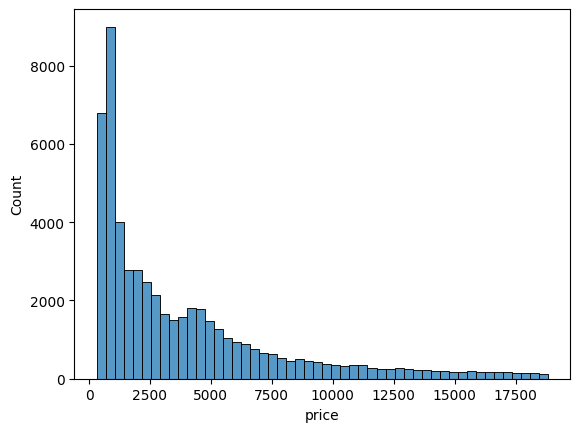

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["price"], bins=50)
plt.show()

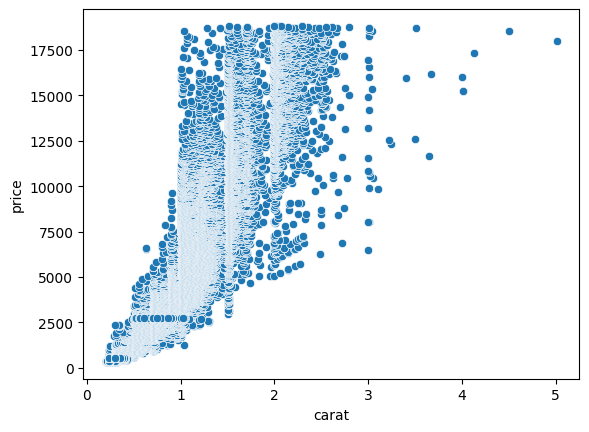

In [86]:
sns.scatterplot(x="carat", y="price", data=df)
plt.show()

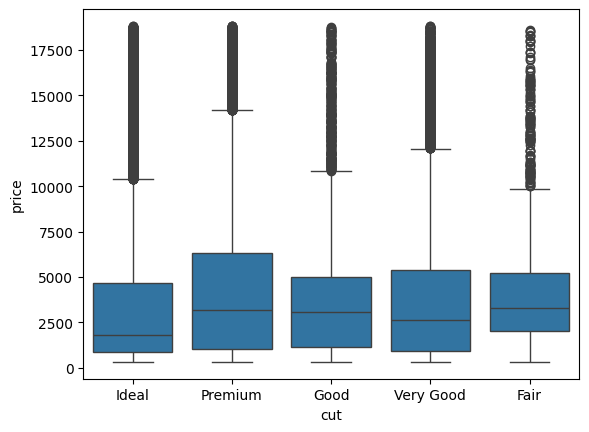

In [87]:
sns.boxplot(x="cut", y="price", data=df)
plt.show()

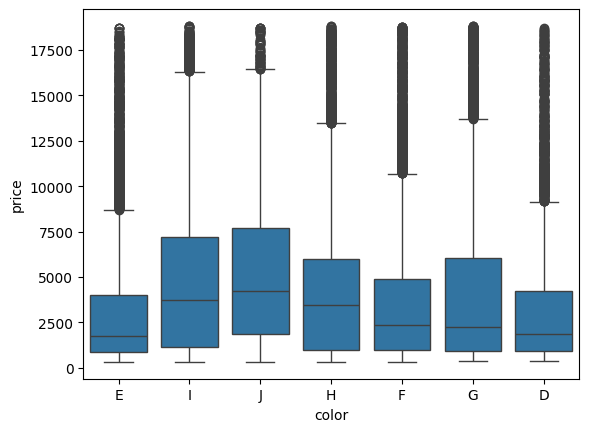

In [88]:
sns.boxplot(x="color", y="price", data=df)
plt.show()

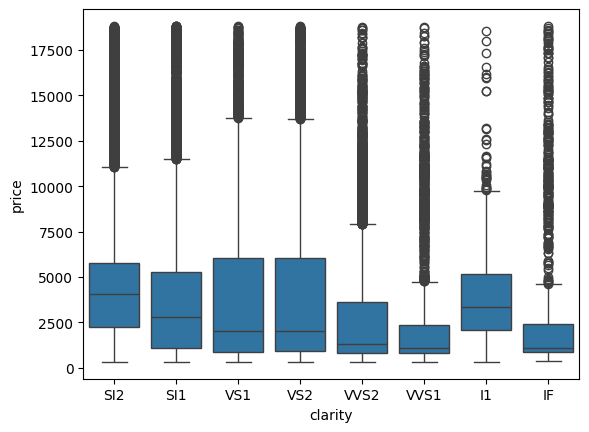

In [89]:
sns.boxplot(x="clarity", y="price", data=df)
plt.show()

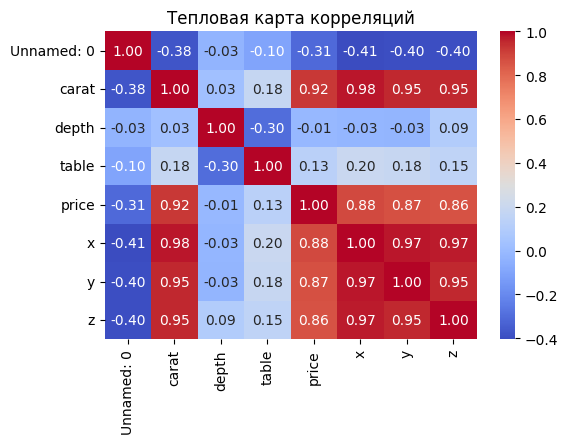

In [90]:
# Тепловая карта корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

In [91]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


df = pd.get_dummies(df, columns=["cut", "color", "clarity"], drop_first=True)

X = df.drop("price", axis=1)
y = df["price"]

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = MinMaxScaler() # Нормализация
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Создание модели
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/home/sutemou/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 18109458.0000 - val_loss: 12911023.0000
Epoch 2/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 10927217.0000 - val_loss: 9055823.0000
Epoch 3/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6683188.0000 - val_loss: 4504431.0000
Epoch 4/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2898098.2500 - val_loss: 1682713.1250
Epoch 5/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1322610.8750 - val_loss: 1029937.3125
Epoch 6/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 980582.5000 - val_loss: 860631.8750
Epoch 7/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 850047.1875 - val_loss: 776058.4375
Epoch 8/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 772535.8125 - val_loss: 709077.4375
Epoch 9/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 723253.3750 - val_loss: 674577.2500
Epoch 10/10
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 689685.0000 - val_loss: 641308.0000


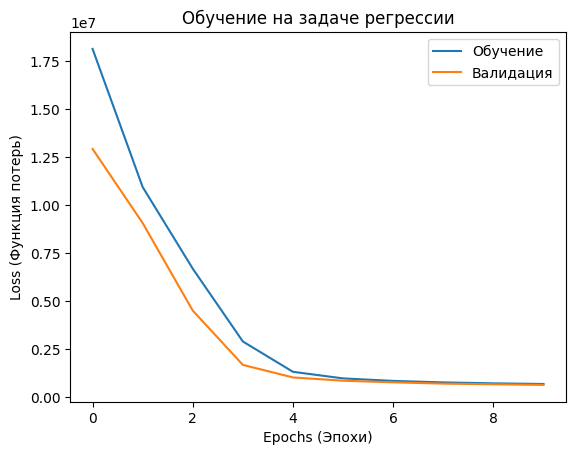

In [92]:
# График обучения
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Обучение на задаче регрессии')
plt.xlabel('Epochs (Эпохи)')
plt.ylabel('Loss (Функция потерь)')
plt.legend()
plt.show()

In [93]:
# Оценка модели на тестовых данных
test_loss = model.evaluate(X_test, y_test)
print(f"Метрика средней квадратичной ошибки (MSE): {test_loss}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 674166.4375
Метрика средней квадратичной ошибки (MSE): 674166.4375


In [94]:
preds = model.predict(X_test)
print(preds)

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[  407.5115 ]
 [ 3568.7917 ]
 [ 1247.1112 ]
 ...
 [  857.18243]
 [10495.59   ]
 [ 3441.8313 ]]
